In [5]:
import yfinance
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


<AxesSubplot:xlabel='Date'>

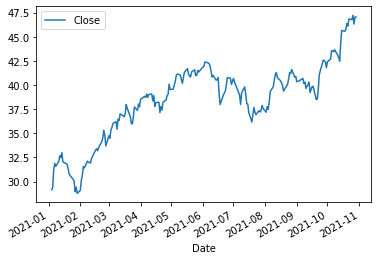

In [3]:
def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt(np.mean(diffs**2))

bac_ticker = yfinance.Ticker('BAC')
bac_frame = bac_ticker.history(period='id', start='2021-01-01', end='2021-10-30')['Close'].to_frame()
bac_frame.plot()

In [4]:
series = bac_frame['Close']
print(series)

Date
2021-01-04    29.151543
2021-01-05    29.374815
2021-01-06    31.209530
2021-01-07    31.898762
2021-01-08    31.578411
                ...    
2021-10-25    46.782906
2021-10-26    47.226021
2021-10-27    46.320099
2021-10-28    47.048771
2021-10-29    47.048771
Name: Close, Length: 209, dtype: float64


In [7]:
ar_deg = 4
model = sm.tsa.AutoReg(series.reset_index()['Close'], ar_deg, trend='n').fit()
print(model.params)

Close.L1    1.030343
Close.L2    0.008232
Close.L3   -0.103910
Close.L4    0.067175
dtype: float64


In [8]:
# coeffs in reverse order to have to reverse them back to what used to
coeffs = list(reversed(model.params))
print(coeffs)

[0.06717496198210805, -0.10391043987172735, 0.008232118997958435, 1.0303434624094945]


In [9]:
# compute root mean square error as estimate of std

std_dev = rmse(model.predict(), series.reset_index()['Close'])
print(std_dev)

0.595591972815344


In [10]:
# follow a number of trajectories, start with 5 and add more later
# number of trajectories
num_samples = 5

In [11]:
# initial values of the each trajectory
# each trajectory = a different row
initial_values = np.array(series[-10:]).reshape(1,-1)
initial_values

array([[45.57173157, 45.76866913, 46.36933517, 46.11331558, 46.84198761,
        46.78290558, 47.22602081, 46.32009888, 47.0487709 , 47.0487709 ]])

In [ ]:
# need to make a 2-d array thas has num_sample copies of this row using numpy `broadcast_to`
values = np.broadcast_to(initial_values, (num_samples, 10))